# Homework 4 - Decision Trees / Random Forests

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's the same data set as from HW3, so that way you'll be familiar with it.

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Decision Trees and Random Forests to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW4.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using. Add any you want to use.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data to remember what it looks like:

In [2]:
heart_df = pd.read_csv('data_hw4.csv')
heart_df.head()
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Part 1: Visual Analysis

In this HW, since you've had plenty of experience with visual analysis in general and on this data set, we are going to skip this part.

### Part 2: Decision Tree & Random Forests

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be entirely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

Your checklist of items to do will be as such:

1. Scale the data (5 pts)
2. Split it into training/testing sets (5 pts)
3. Predict Heart Disease Using Decision Trees and Random Forests (40 pts)
- As a note, you'll want to try and optimize the parameters within these models to have good accuracy as well as good generalization (no overfitting). 
- Also, you need to rank your features in terms of feature importance (How would you do this?)
4. Write a report, which should have ample information on your methods, implementation, results, and various graphs/charts explaining how your model performed. For decision trees, you may try finding a way to visualize the best performing decision tree. The report has the following criteria (50 pts): 
- Should be at LEAST 3-4 paragraphs
- Explain your methods, including optimization techniques and WHY you used them
- Contain at LEAST 3 charts/graphs showcasing how well your methods predicted heart disease

On this HW, it is very difficult to copy your friends, as it will be obvious. Cheating will result in an automatic zero, so make sure your work is original. The point of these HW assignments is for you to think, so if you simply tell me what you did or type definitions of methods to make your report seem long, you will lose points. Each HW assignment is graded in detail.

In [3]:
# Scale the data using MinMaxScaler()
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(heart_df.drop('death', axis = 1)) 
scaled_df = pd.DataFrame(scaled_df, columns = heart_df.columns[:-1]) 

scaled_df.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [4]:
# Split the data into training and testing sets
X = scaled_df
y = heart_df['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
# Create a decision tree and make predictions
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)

print('Decision Tree accuracy score: {0:0.4f}'.format(accuracy_score(y_test, tree_predictions)))

Decision Tree accuracy score: 0.6778


In [6]:
# Optimize the decision tree hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

tree_grid = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)

print("Best hyperparameters:", tree_grid.best_params_)
print("Train score:", tree_grid.best_score_)
print("Test score:", tree_grid.score(X_test, y_test))

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.832752613240418
Test score: 0.7222222222222222


In [7]:
# Create a random forest and make predictions
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)

print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_test, forest_predictions)))

Random Forest accuracy score: 0.7667


In [8]:
# Optimize the random forest hyperparameters
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

forest_search = GridSearchCV(forest, param_grid=param_grid, cv=5, n_jobs=-1)
forest_search.fit(X_train, y_train)

print("Best hyperparameters:", forest_search.best_params_)
print("Train score:", forest_search.best_score_)
print("Test score:", forest_search.score(X_test, y_test))

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Train score: 0.8663182346109176
Test score: 0.7777777777777778


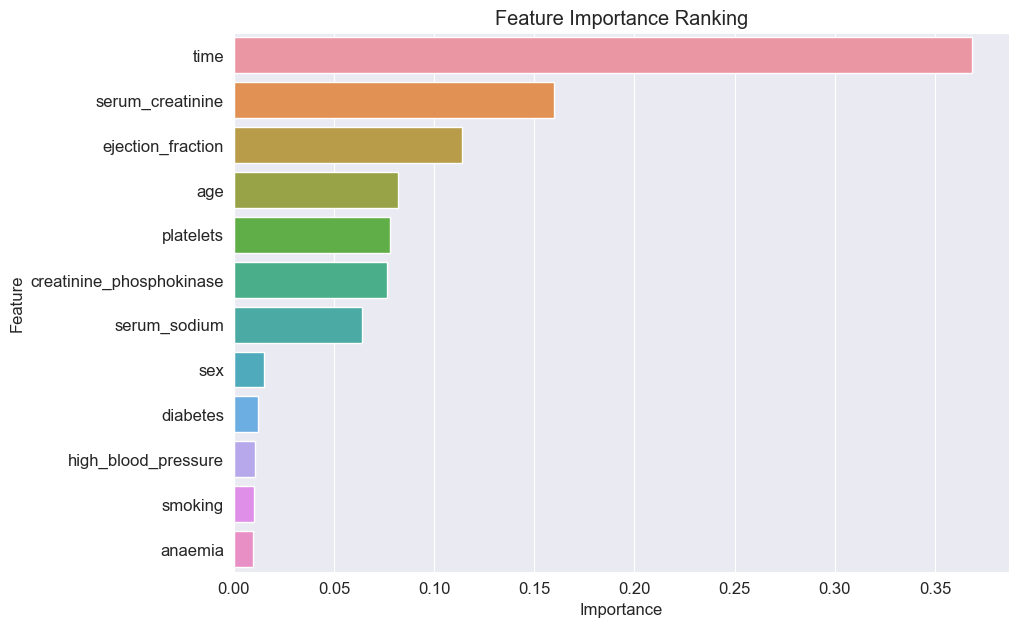

In [9]:
# Rank the features in terms of importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(heart_df.drop(columns=['death']).columns)

plt.figure(figsize=(10, 7))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importance Ranking")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### Report (part 1):
This program aimed to build and optimize decision tree and random forest models to predict heart disease given the information of 299 patients. The data was first preprocessed by scaling the features using MinMaxScaler and splitting the data into training and testing sets. MinMaxScaler was used to scale the data on a fixed range between 0 to 1, so all of the features are on the same scale. Decision tree and random forest classifiers were then trained on the training data, and the accuracy scores on the testing data were evaluated to determine which model did a better job predicting heart disease.

The decision tree did an average job of classifying with an accuracy score of around 0.68, meaning that it was necessary to improve it using hyperparameter optimization. We used a confusion matrix to determine how well the tree classified whether a patient survived or not. Additionally, we used a precision-recall curve to determine that the tradeoff between precision and recall was an inverse relationship. Lastly, the ROC curve portrayed the compromise between sensitivity and specificity, however, our model appeared to perform slightly better than a random classifier. Clearly, our model did a mediocre job predicting heart disease. To optimize the parameters, we decided to use grid search performed using cross-validation with 5 folds because we wanted to maximize the accuracy of our model by performing an exhaustive search over the specified parameter space. A model with optimized parameters limits the probability of encountering false classifications. 

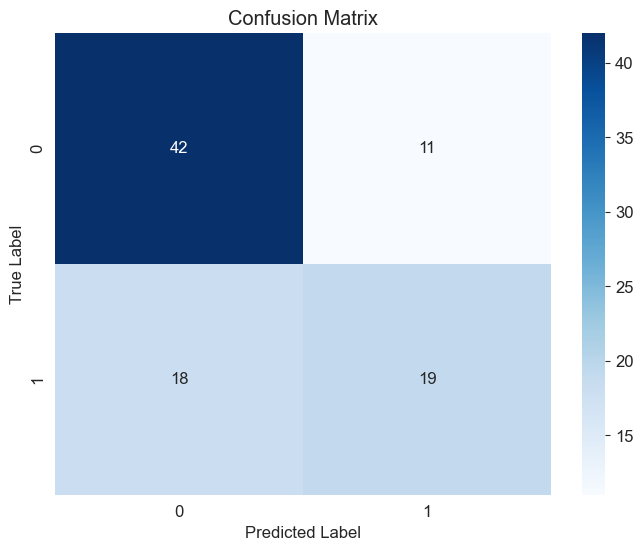

In [10]:
# Confusion Matrix for decision tree
cm = confusion_matrix(y_test, tree_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

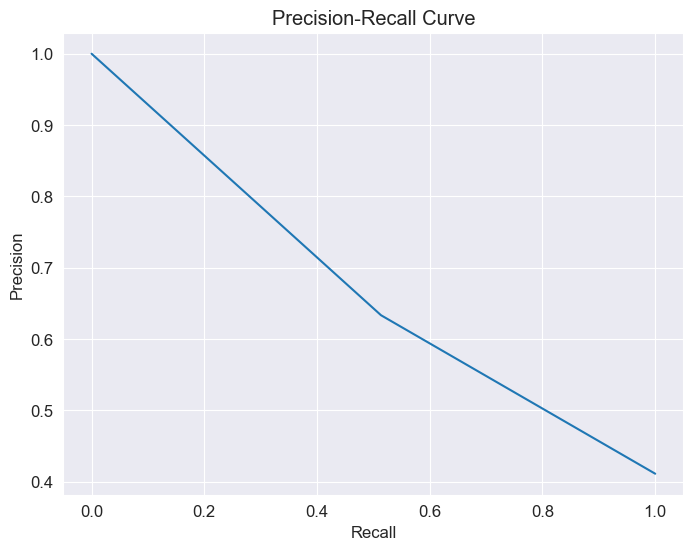

In [11]:
# Precision-recall curve for the decision tree
from sklearn.metrics import precision_recall_curve

tree_probabilities = tree.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, tree_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

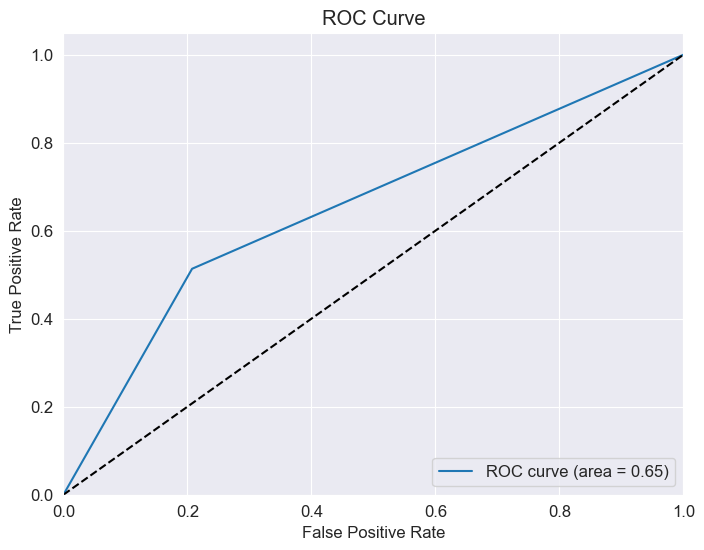

In [12]:
# Create ROC curve to show how well decision tree distinguishes between positive and negative samples
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, tree_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Report (part 2):
The random forest did a better job of classifying with an accuracy score of 0.76, meaning that it performed better than the decision tree, but it can still be improved. We decided to use the same charts/graphs for the random forest as we did for the decision tree to make it easier to compare. The random forest had more positive predictions and less negative predictions than the decision tree, as indicated by the confusion matrix. Additionally, the ROC curve was closer to the top left corner, and the precision-recall curve was closer to the top right corner, meaning that the random forest classifier is more accurate in predicting death. We optimized our parameters by using grid search and cross-validation with 5 folds to make the random forest comparable to the decision tree. 

After optimizing the parameters of each model and performing tests on them, it became evident that the random forest was the more accurate classification model. Since the random forest model made less false classifications (FP and FN), it makes more sense to use it because we want to limit the misclassifications that can result in a patient's death. The feature importance ranking plot for the random forest model indicated that the most important features for predicting death were time, serum_creatinine, ejection_fraction, and age. Thus, it is important to take those features into account when predicting death.

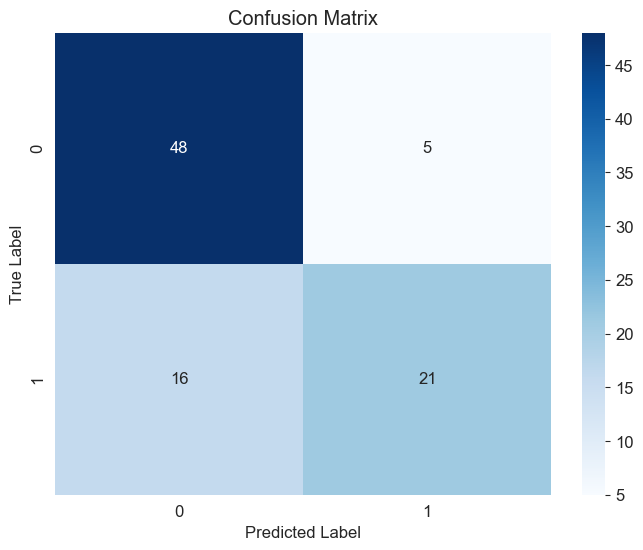

In [13]:
cm = confusion_matrix(y_test, forest_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

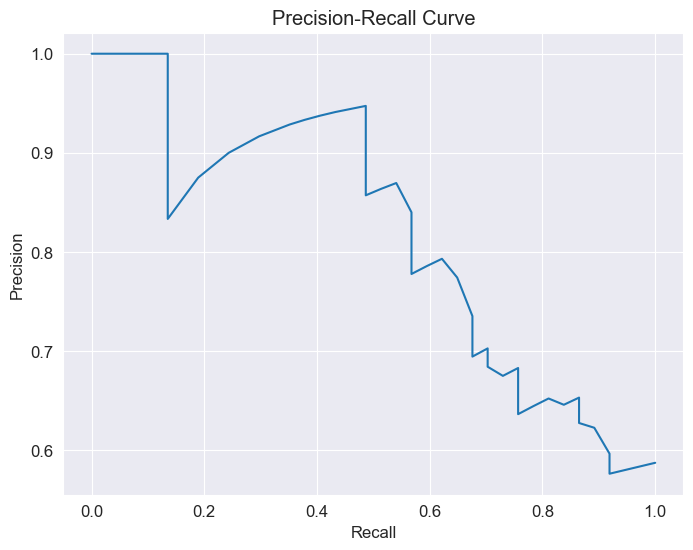

In [14]:
# Precision-recall curve for random forest
forest_probabilities = forest.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, forest_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

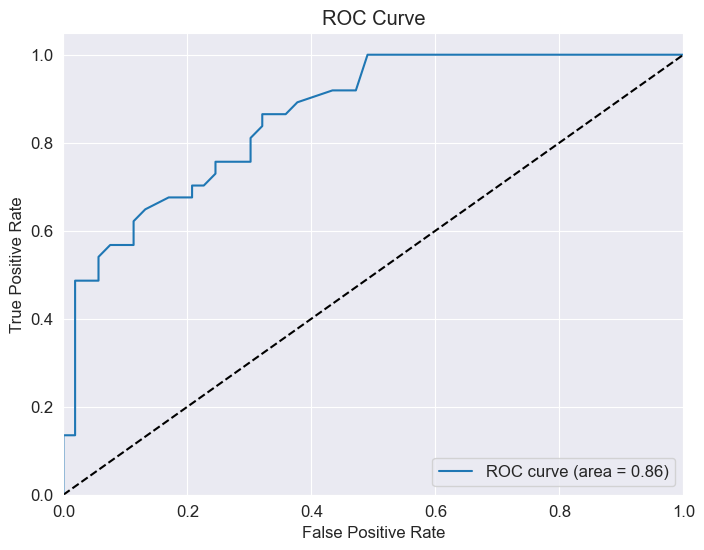

In [15]:
# Create ROC curve to show how well random forest distinguishes between positive and negative samples
fpr, tpr, thresholds = roc_curve(y_test, forest_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()